In [1]:
import sys

import numpy as np
import torch
import matplotlib.pyplot as plt

from pygsp import graphs

sys.path.insert(0, '..')
from graph_deep_decoder import datasets as ds
from graph_deep_decoder import utils

SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)

In [2]:
def plot_matrix(A, save_path=None):
    # Interval for showing 10 ticks
    N = A.shape[1]
    extent = 1, N, N, 1
    
    # Plot matrices
    plt.figure()
    plt.imshow(A/np.max(A), extent=extent)
    
    ticks = plt.gca().get_xticks()
    ticks[0] = 1
    if ticks[-1] > N:
        ticks = ticks[:-1]
    
    plt.xticks(fontsize=18, ticks=ticks)
    plt.yticks(fontsize=18, ticks=ticks)
    
    plt.clim(0, 1)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=18)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path,bbox_inches='tight')

## Small World

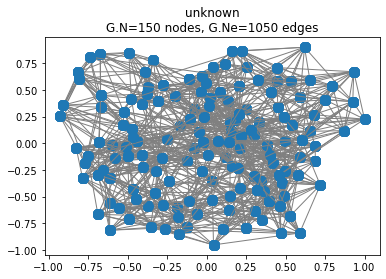

In [3]:
Gs = {'type': ds.SW, 'N': 150, 'k': 15, 'p': 0.2}
G = ds.create_graph(Gs, SEED)
A = np.asarray(G.W.todense().astype(int))
D_inv_sqrt = np.diag(1/np.sqrt(np.sum(A,1)))
A = D_inv_sqrt.dot(A.dot(D_inv_sqrt))
G.plot()

K = 3
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
H2 = H.dot(H.T)

# Compute E[JJ]
H_norm = H/np.linalg.norm(H, axis=0)
H2_norm = H_norm.T.dot(H_norm)
H2_norm[H2_norm>1]=1

Z = 1-np.arccos(H2_norm)/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H2)

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

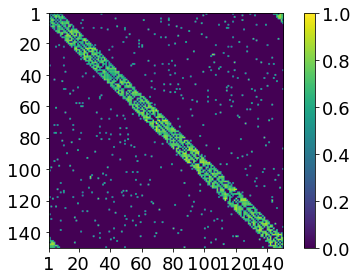

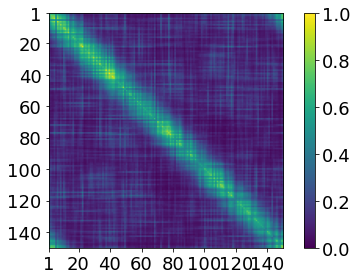

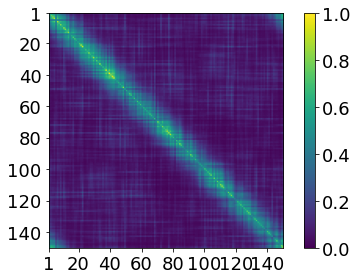

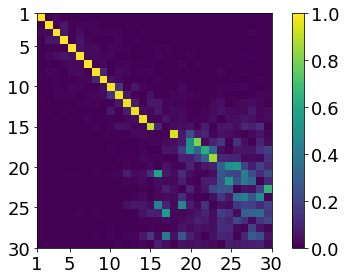

In [6]:
# Plot matrices
plot_matrix(A/np.max(A), '../results/other_graphs/SW_A.eps')
plot_matrix(H2/np.max(H2), '../results/other_graphs/SW_HH.eps')
plot_matrix(E_JJ_an/np.max(E_JJ_an), '../results/other_graphs/SW_E.eps')

k = 30
cross_product = abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k]))
plot_matrix(cross_product, '../results/other_graphs/SW_orthogonality.eps')

## Using Zachary's Karate Graph

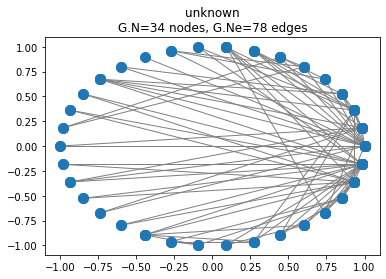

In [9]:
A = np.load('../dataset/karate_Adj.npy')
D_inv_sqrt = np.diag(1/np.sqrt(np.sum(A,1)))
A = D_inv_sqrt.dot(A.dot(D_inv_sqrt))
G = graphs.Graph(A)
G.set_coordinates('ring2D')
G.plot()

K = 4
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
H2 = H.dot(H.T)

# Compute E[JJ]
H_norm = H/np.linalg.norm(H, axis=0)
H2_norm = H_norm.T.dot(H_norm)
H2_norm[H2_norm>1]=1

Z = 1-np.arccos(H2_norm)/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H2)

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

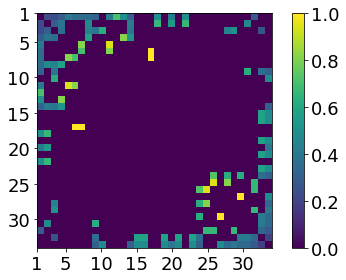

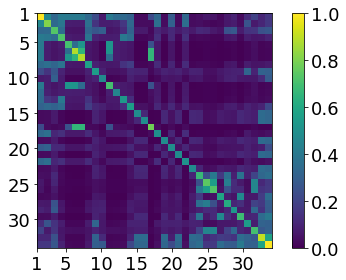

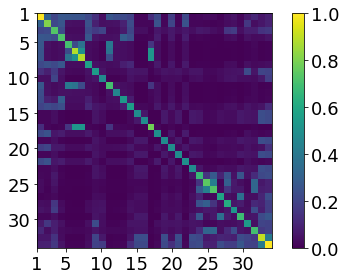

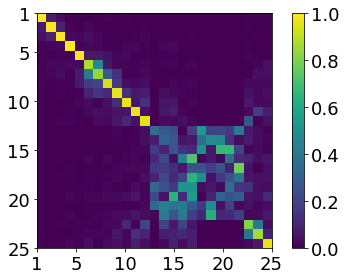

In [10]:
# Plot matrices
plot_matrix(A/np.max(A), '../results/other_graphs/Zach_A.eps')
plot_matrix(H2/np.max(H2), '../results/other_graphs/Zach_HH.eps')
plot_matrix(E_JJ_an/np.max(E_JJ_an), '../results/other_graphs/Zach_E.eps')

k = 25
cross_product = abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k]))
plot_matrix(cross_product, '../results/other_graphs/Zach_orthogonality.eps')

## Using Temperature Graph

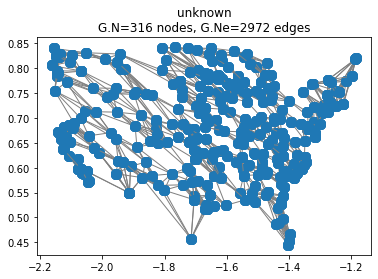

In [11]:
npzfile = np.load('../dataset/temperatures2003_3months.npz')
A = npzfile['A']
D_inv_sqrt = np.diag(1/np.sqrt(np.sum(A,1)))
A = D_inv_sqrt.dot(A.dot(D_inv_sqrt))

Coords = npzfile['Coords']

G = graphs.Graph(A)
G.set_coordinates(Coords)
G.plot()

K = 10
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
H2 = H.dot(H.T)

# Compute E[JJ]
H_norm = H/np.linalg.norm(H, axis=0)
H2_norm = H_norm.T.dot(H_norm)
H2_norm[H2_norm>1]=1

Z = 1-np.arccos(H2_norm)/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H2)

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

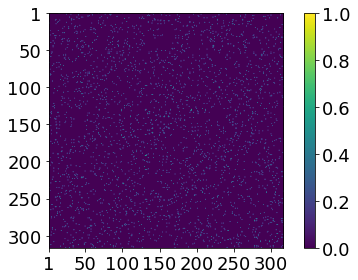

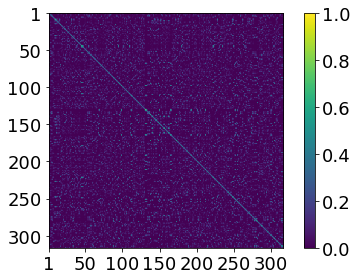

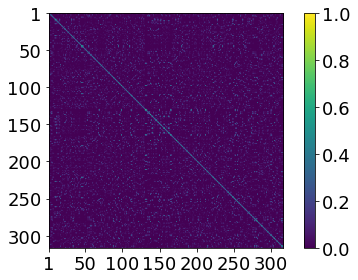

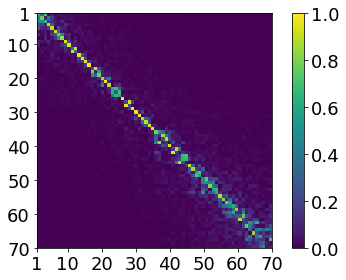

In [12]:
# Plot matrices
plot_matrix(A/np.max(A), '../results/other_graphs/temperatures_A.eps')
plot_matrix(H2/np.max(H2), '../results/other_graphs/temperatures_HH.eps')
plot_matrix(E_JJ_an/np.max(E_JJ_an), '../results/other_graphs/temperatures_E.eps')

k = 70
cross_product = abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k]))
plot_matrix(cross_product, '../results/other_graphs/temperatures_orthogonality.eps')

In [24]:
plt.show()